<a href="https://colab.research.google.com/github/ftk1000/KGL/blob/master/moa_metric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# moa_metric.ipynb
# 2020.11.26
# MoA metric from https://www.youtube.com/watch?v=D7i67UT3O3o&feature=youtu.be

import numpy as np

def log_loss(y, yht):
  r = -np.sum(y*np.log(yht) + (1-y)*np.log(1-yht))/len(y)
  return r

def clip(x):  
  eps = 1E-15
  return np.fmax(  np.fmin(x, 1.0-eps), eps  )


In [38]:
N=200 # number of targets - we will assume each target is a constant for all entry points
y = targets = np.random.randint(0,2,N+1)
# print('targets=y=',targets)

# here are get predictions for each target value
yhat = predictions = np.arange(0,1.01,1/N)
# print('yhat=',yhat)
# print ( len(yhat), len(y))

In [39]:
clip(yhat)[10]

0.05

In [40]:
xs = [] 
ys = []
for i in  yhat:
  # print('i=',i)
  xs.append(i)
  i2yhat = np.array(clip([i]*(N+1)) )
  logloss = log_loss(y, i2yhat )
  ys.append(  logloss )

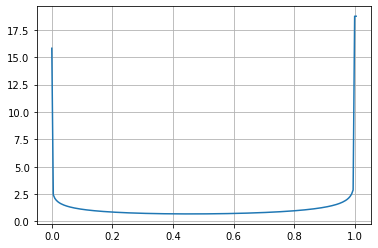

In [41]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
plt.plot(xs,ys)
plt.grid()